In [10]:
import numpy as np
from pandas import read_csv
import pandas_datareader.data as web

In [11]:
doge = web.DataReader('MONA-USD', 'yahoo')
doge

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-09,3.039360,2.840420,2.855220,2.967630,4630550,2.967630
2017-11-10,2.993850,2.606440,2.959770,2.616590,3069090,2.616590
2017-11-11,2.714720,2.520320,2.627440,2.597220,3258960,2.597220
2017-11-12,3.109670,2.173080,2.598040,2.817210,9822060,2.817210
2017-11-13,3.254420,2.666150,2.795100,2.895720,9818930,2.895720
...,...,...,...,...,...,...
2022-04-26,0.873849,0.848864,0.871581,0.854787,343544,0.854787
2022-04-27,0.874509,0.846216,0.854779,0.853320,290011,0.853320
2022-04-28,0.861507,0.836389,0.852525,0.843836,211458,0.843836


In [12]:
#lstm_data = np.genfromtxt('./sample_data/lstm.csv', delimiter=',', skip_header=True)
lstm_data = read_csv('lstmsamo.csv')
lstm_data = lstm_data.drop(['Date'], axis=1)
print(lstm_data)

        High       Low      Open     Close   Volume  Adj Close  Polarity Score
0   0.040466  0.038822  0.039959  0.039110  4540382   0.039110        0.095867
1   0.021496  0.019967  0.021055  0.020416  2354228   0.020416        0.146020
2   0.021305  0.020069  0.021282  0.020087  3187547   0.020087        0.138143
3   0.025363  0.023064  0.024562  0.023468  8960013   0.023468        0.146417
4   0.039302  0.037781  0.039100  0.037854  3339748   0.037854        0.071015
..       ...       ...       ...       ...      ...        ...             ...
56  0.023269  0.022024  0.022421  0.022790  3532996   0.022790        0.114973
57  0.016646  0.015695  0.016506  0.015704  5824475   0.015704        0.131016
58  0.022805  0.021691  0.022789  0.022610  5609570   0.022610        0.107061
59  0.015840  0.015388  0.015713  0.015509  5317448   0.015509        0.141040
60  0.022841  0.021453  0.022609  0.021560  5378382   0.021560        0.083907

[61 rows x 7 columns]


In [13]:
lstm_data_X = lstm_data.drop(['Close'], axis=1)
lstm_data_y = lstm_data['Close']

In [14]:
look_back = 5 # how many days to look back
batch_size = 3 # size of batches used when training
n_feat = 6 # number of features 
n_target = 2
n_validation = 6
n_test = 8
n_train = lstm_data_X.shape[0] - n_validation - n_test - 1


In [15]:
n_train

46

In [16]:
#lstm_data_X_train = lstm_data_X.iloc[:30,:]
#lstm_data_X_val = lstm_data_X.iloc[30:40,:]
#lstm_data_X_test = lstm_data_X.iloc[40:52,:]

#lstm_data_y_train = lstm_data_y.iloc[:30]
#lstm_data_y_val = lstm_data_y.iloc[30:40]
#lstm_data_y_test = lstm_data_y.iloc[40:52]
# Convert to numpy arrays
#X_train = lstm_data_X_train.to_numpy()
#X_val = lstm_data_X_val.to_numpy()
#X_test = lstm_data_X_test.to_numpy()
#y_train = lstm_data_y_train.to_numpy()
#y_val = lstm_data_y_val.to_numpy()
#y_test = lstm_data_y_test.to_numpy()

In [17]:
lstm_data_X_train = lstm_data_X.iloc[:n_train,:]
lstm_data_X_val = lstm_data_X.iloc[n_train:n_train + n_validation,:]
lstm_data_X_test = lstm_data_X.iloc[n_train + n_validation:n_train + n_validation + n_test,:]

lstm_data_y_train = lstm_data_y.iloc[:n_train]
lstm_data_y_val = lstm_data_y.iloc[n_train:n_train + n_validation]
lstm_data_y_test = lstm_data_y.iloc[n_train + n_validation:n_train + n_validation + n_test]
# Convert to numpy arrays
X_train = lstm_data_X_train.to_numpy()
X_val = lstm_data_X_val.to_numpy()
X_test = lstm_data_X_test.to_numpy()
y_train = lstm_data_y_train.to_numpy()
y_val = lstm_data_y_val.to_numpy()
y_test = lstm_data_y_test.to_numpy()

In [18]:
X_test

array([[1.60910003e-02, 1.56830009e-02, 1.58719998e-02, 4.58019800e+06,
        1.58030000e-02, 1.48283467e-01],
       [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
        2.02270001e-02, 1.31502325e-01],
       [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
        2.24239994e-02, 1.53586280e-01],
       [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
        1.65059995e-02, 1.28670540e-01],
       [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.53299600e+06,
        2.27899998e-02, 1.14973180e-01],
       [1.66459996e-02, 1.56950001e-02, 1.65059995e-02, 5.82447500e+06,
        1.57040004e-02, 1.31015680e-01],
       [2.28049997e-02, 2.16910001e-02, 2.27889996e-02, 5.60957000e+06,
        2.26099994e-02, 1.07060620e-01],
       [1.58396158e-02, 1.53879039e-02, 1.57133099e-02, 5.31744800e+06,
        1.55088129e-02, 1.41039940e-01]])

In [19]:
y_test

array([0.015803  , 0.020227  , 0.022424  , 0.016506  , 0.02279   ,
       0.015704  , 0.02261   , 0.01550881])

In [20]:
import keras
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, ThresholdedReLU, MaxPooling2D, Embedding, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [21]:
train_data_gen = TimeseriesGenerator(X_train, y_train, length=look_back, batch_size=batch_size)
val_data_gen = TimeseriesGenerator(X_val, y_val, length=look_back, batch_size=batch_size)
test_data_gen = TimeseriesGenerator(X_test, y_test, length=look_back, batch_size=batch_size)

In [22]:
# check generator dimensions
for i in range(len(train_data_gen)):
    x, y = train_data_gen[i]
    print(x.shape, y.shape)

(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(3, 5, 6) (3,)
(2, 5, 6) (2,)


In [23]:
model_lstm = Sequential()
model_lstm.add(LSTM(32, input_shape=(look_back, n_feat), return_sequences=True))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.1))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer="adam", loss='mse', metrics=["mse"])
print(model_lstm.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 32)             4992      
                                                                 
 dropout (Dropout)           (None, 5, 32)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 13,345
Trainable params: 13,345
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
hist = model_lstm.fit_generator(train_data_gen,
                                        steps_per_epoch=10,
                                        epochs=20,
                                        verbose=1,
                                        validation_data=val_data_gen)

Epoch 1/20


C:\Users\moham\AppData\Local\Temp/ipykernel_19092/192094070.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model_lstm.fit_generator(train_data_gen,


10/10 [==============================] - 5s 98ms/step - loss: 0.0778 - mse: 0.0778 - val_loss: 0.0070 - val_mse: 0.0070
Epoch 2/20
10/10 [==============================] - 0s 12ms/step - loss: 0.0238 - mse: 0.0238 - val_loss: 0.0111 - val_mse: 0.0111
Epoch 3/20
10/10 [==============================] - 0s 11ms/step - loss: 0.0098 - mse: 0.0098 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 4/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0070 - mse: 0.0070 - val_loss: 5.6983e-04 - val_mse: 5.6983e-04
Epoch 5/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 4.4893e-04 - val_mse: 4.4893e-04
Epoch 6/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0069 - mse: 0.0069 - val_loss: 1.1665e-04 - val_mse: 1.1665e-04
Epoch 7/20
10/10 [==============================] - 0s 10ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 2.4737e-05 - val_mse: 2.4737e-05
Epoch 8/20
10/10 [==============================] - 0s 11ms/st

In [25]:
pred = model_lstm.predict(test_data_gen)

In [26]:
test_data_gen[0]

(array([[[1.60910003e-02, 1.56830009e-02, 1.58719998e-02, 4.58019800e+06,
          1.58030000e-02, 1.48283467e-01],
         [2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
          2.02270001e-02, 1.31502325e-01],
         [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
          2.24239994e-02, 1.53586280e-01],
         [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
          1.65059995e-02, 1.28670540e-01],
         [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.53299600e+06,
          2.27899998e-02, 1.14973180e-01]],
 
        [[2.02500001e-02, 1.89590007e-02, 1.90309994e-02, 4.10461000e+06,
          2.02270001e-02, 1.31502325e-01],
         [2.25079991e-02, 1.84300002e-02, 1.84509996e-02, 7.97182800e+06,
          2.24239994e-02, 1.53586280e-01],
         [1.65059995e-02, 1.55039998e-02, 1.58009995e-02, 5.23944600e+06,
          1.65059995e-02, 1.28670540e-01],
         [2.32689995e-02, 2.20240001e-02, 2.24210005e-02, 3.5

In [27]:
pred

array([[0.01891597],
       [0.01891597],
       [0.01891597]], dtype=float32)

In [28]:
import matplotlib.pyplot as plt

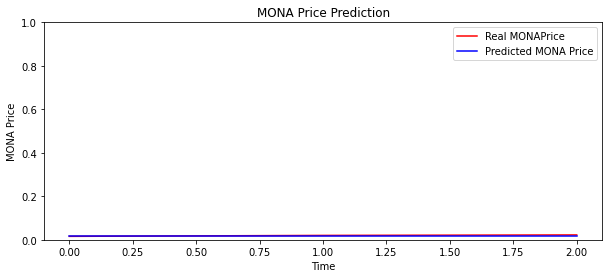

In [29]:
# Visualising the results
plt.figure(figsize=(10,4))
plt.plot(y_test[0:y_test.shape[0]-5], color = 'red', label = 'Real MONAPrice')
plt.plot(pred, color = 'blue', label = 'Predicted MONA Price')
plt.title('MONA Price Prediction')
plt.xlabel('Time')
plt.ylabel('MONA Price')
plt.ylim(0,1)
plt.legend()
plt.show()